## Energy potential-dependence wavelength shifts

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [48]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\valores_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\valores_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).reset_index(drop=True)

#List of Nave with the potentials values
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Characterization\Third signature\Nave list potential.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

In [49]:
# Take the energy potential values from the nave list
#Convert the wavelength in A cause its in cm^-1 
raw_lambda['Wave A'] = round((10**8)/raw_lambda['Wave (cm)'],4)
raw_lambda = raw_lambda.sort_values('Wave A', ascending=True, na_position='first')
raw_lambda = raw_lambda[raw_lambda['Wave A'].between(4000,23000,inclusive='right')] #Separate the range for use
raw_lambda = raw_lambda[raw_lambda['Quality']=='A'].drop(['Wave (cm)'],axis=1).reset_index(drop=True)
raw_lambda

,Quality,Lower potential level,Higher potential level,Wave A
0,A,2.990,6.089,4001.5883
1,A,2.176,5.273,4002.7931
2,A,3.237,6.331,4005.9597
3,A,3.017,6.112,4006.1108
4,A,1.557,4.652,4006.3743
...,...,...,...,...
3280,A,5.099,5.642,22838.5953
3281,A,5.828,6.370,22852.1702
3282,A,5.839,6.380,22888.7529
3283,A,5.334,5.874,22962.2707


In [50]:
# Take the energy excitation values for the lines
Energy_data = pd.DataFrame([])
Lower_potential = []
Higher_potential = []

for i in range(len(ALL_data)):
    data = raw_lambda[raw_lambda['Wave A'] == ALL_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data['Lower potential'] = Lower_potential
Energy_data['Higher potential'] = Higher_potential
Energy_data['Velocity'] = ALL_data['Velocity']
Energy_data['Wave A'] = ALL_data['Observed wavelength']
Energy_data['Line Depth'] =1- ALL_data['Flux']

Energy_data

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-367,4060.8637,0.680344
1,2.176,5.273,-213,4068.4255,0.790107
2,3.237,6.331,-324,4080.9941,0.785819
3,3.017,6.112,-185,4086.1634,0.779078
4,1.557,4.652,-384,4088.2510,0.711281
...,...,...,...,...,...
804,4.593,6.697,-521,17688.7463,0.271212
805,4.638,6.741,-680,17775.9768,0.382206
806,4.256,6.359,-491,20722.6196,0.239538
807,4.217,6.321,-665,21254.7553,0.017801


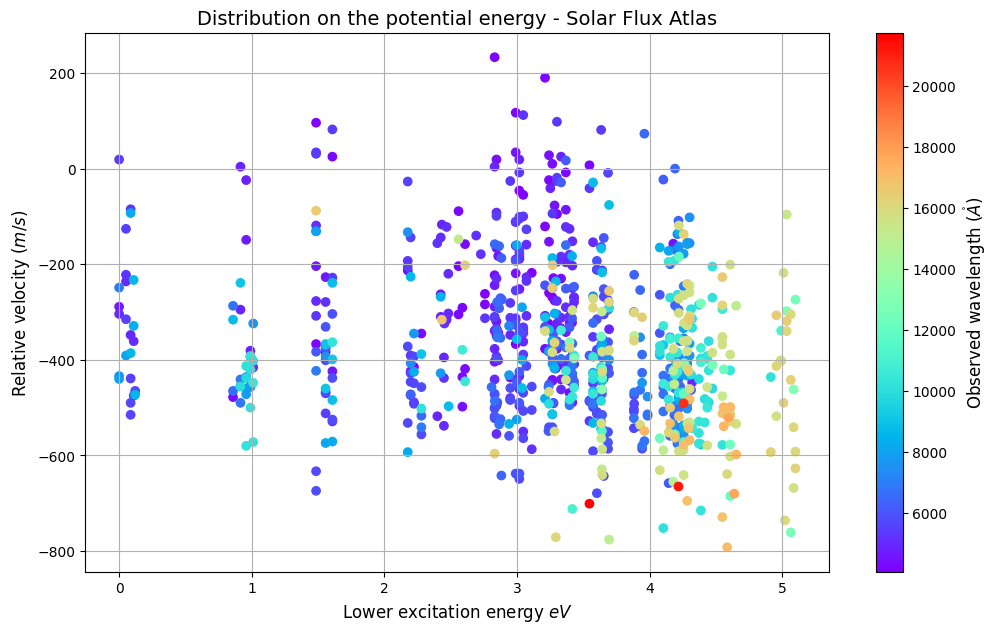

In [51]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data['Lower potential'],Energy_data['Velocity'],c=Energy_data['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Distribution on the potential energy - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Lower excitation energy $eV$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

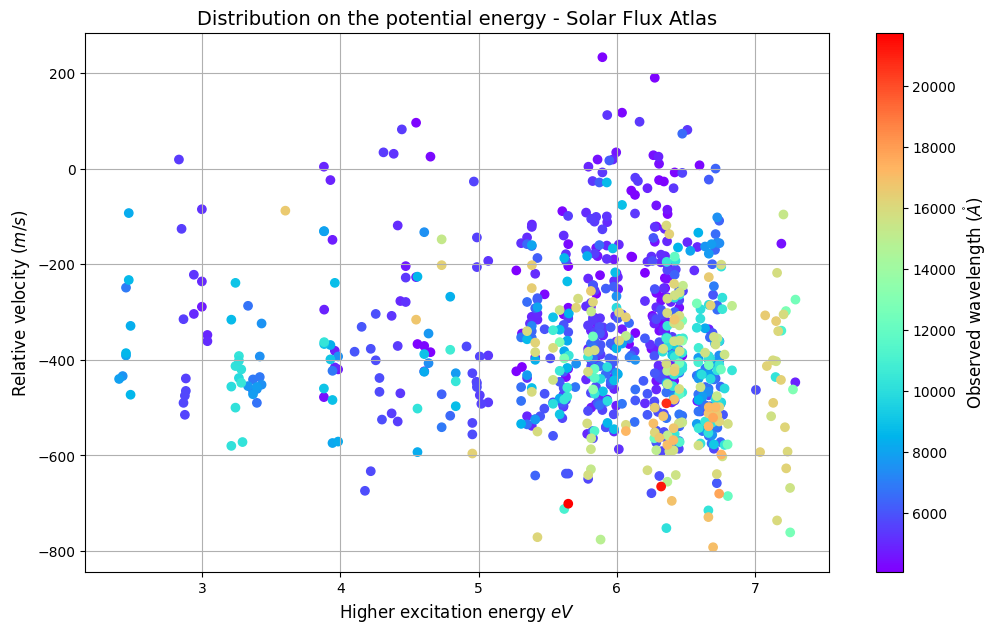

In [52]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data['Higher potential'],Energy_data['Velocity'],c=Energy_data['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Distribution on the potential energy - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Higher excitation energy $eV$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

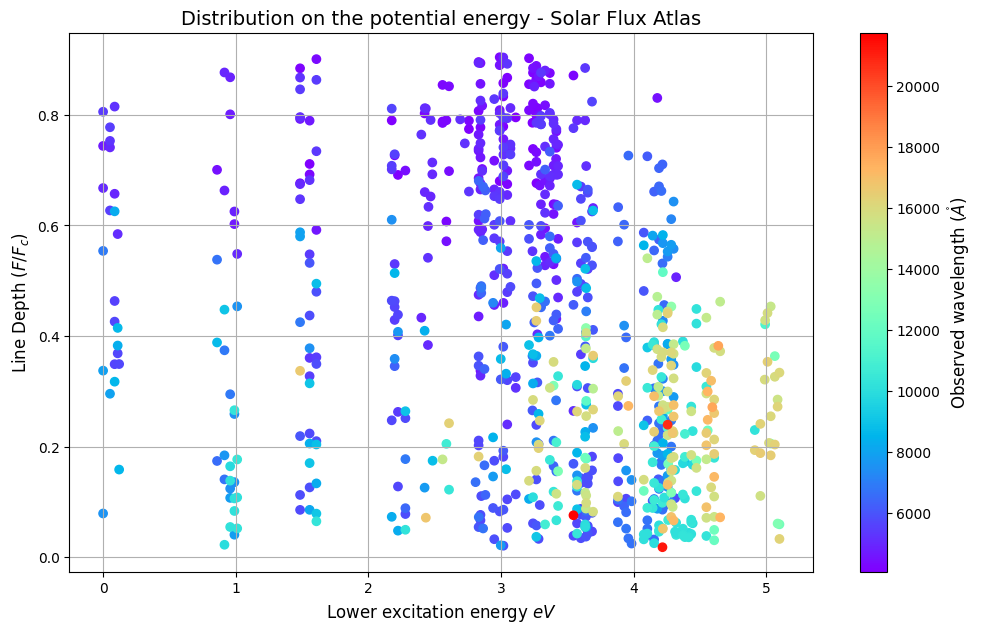

In [53]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data['Lower potential'],Energy_data['Line Depth'],c=Energy_data['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Distribution on the potential energy - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Lower excitation energy $eV$',fontsize=12)
ax.set_ylabel(r'Line Depth $(F/F_c)$',fontsize=12)
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

### Chromodependence on the chromodependence

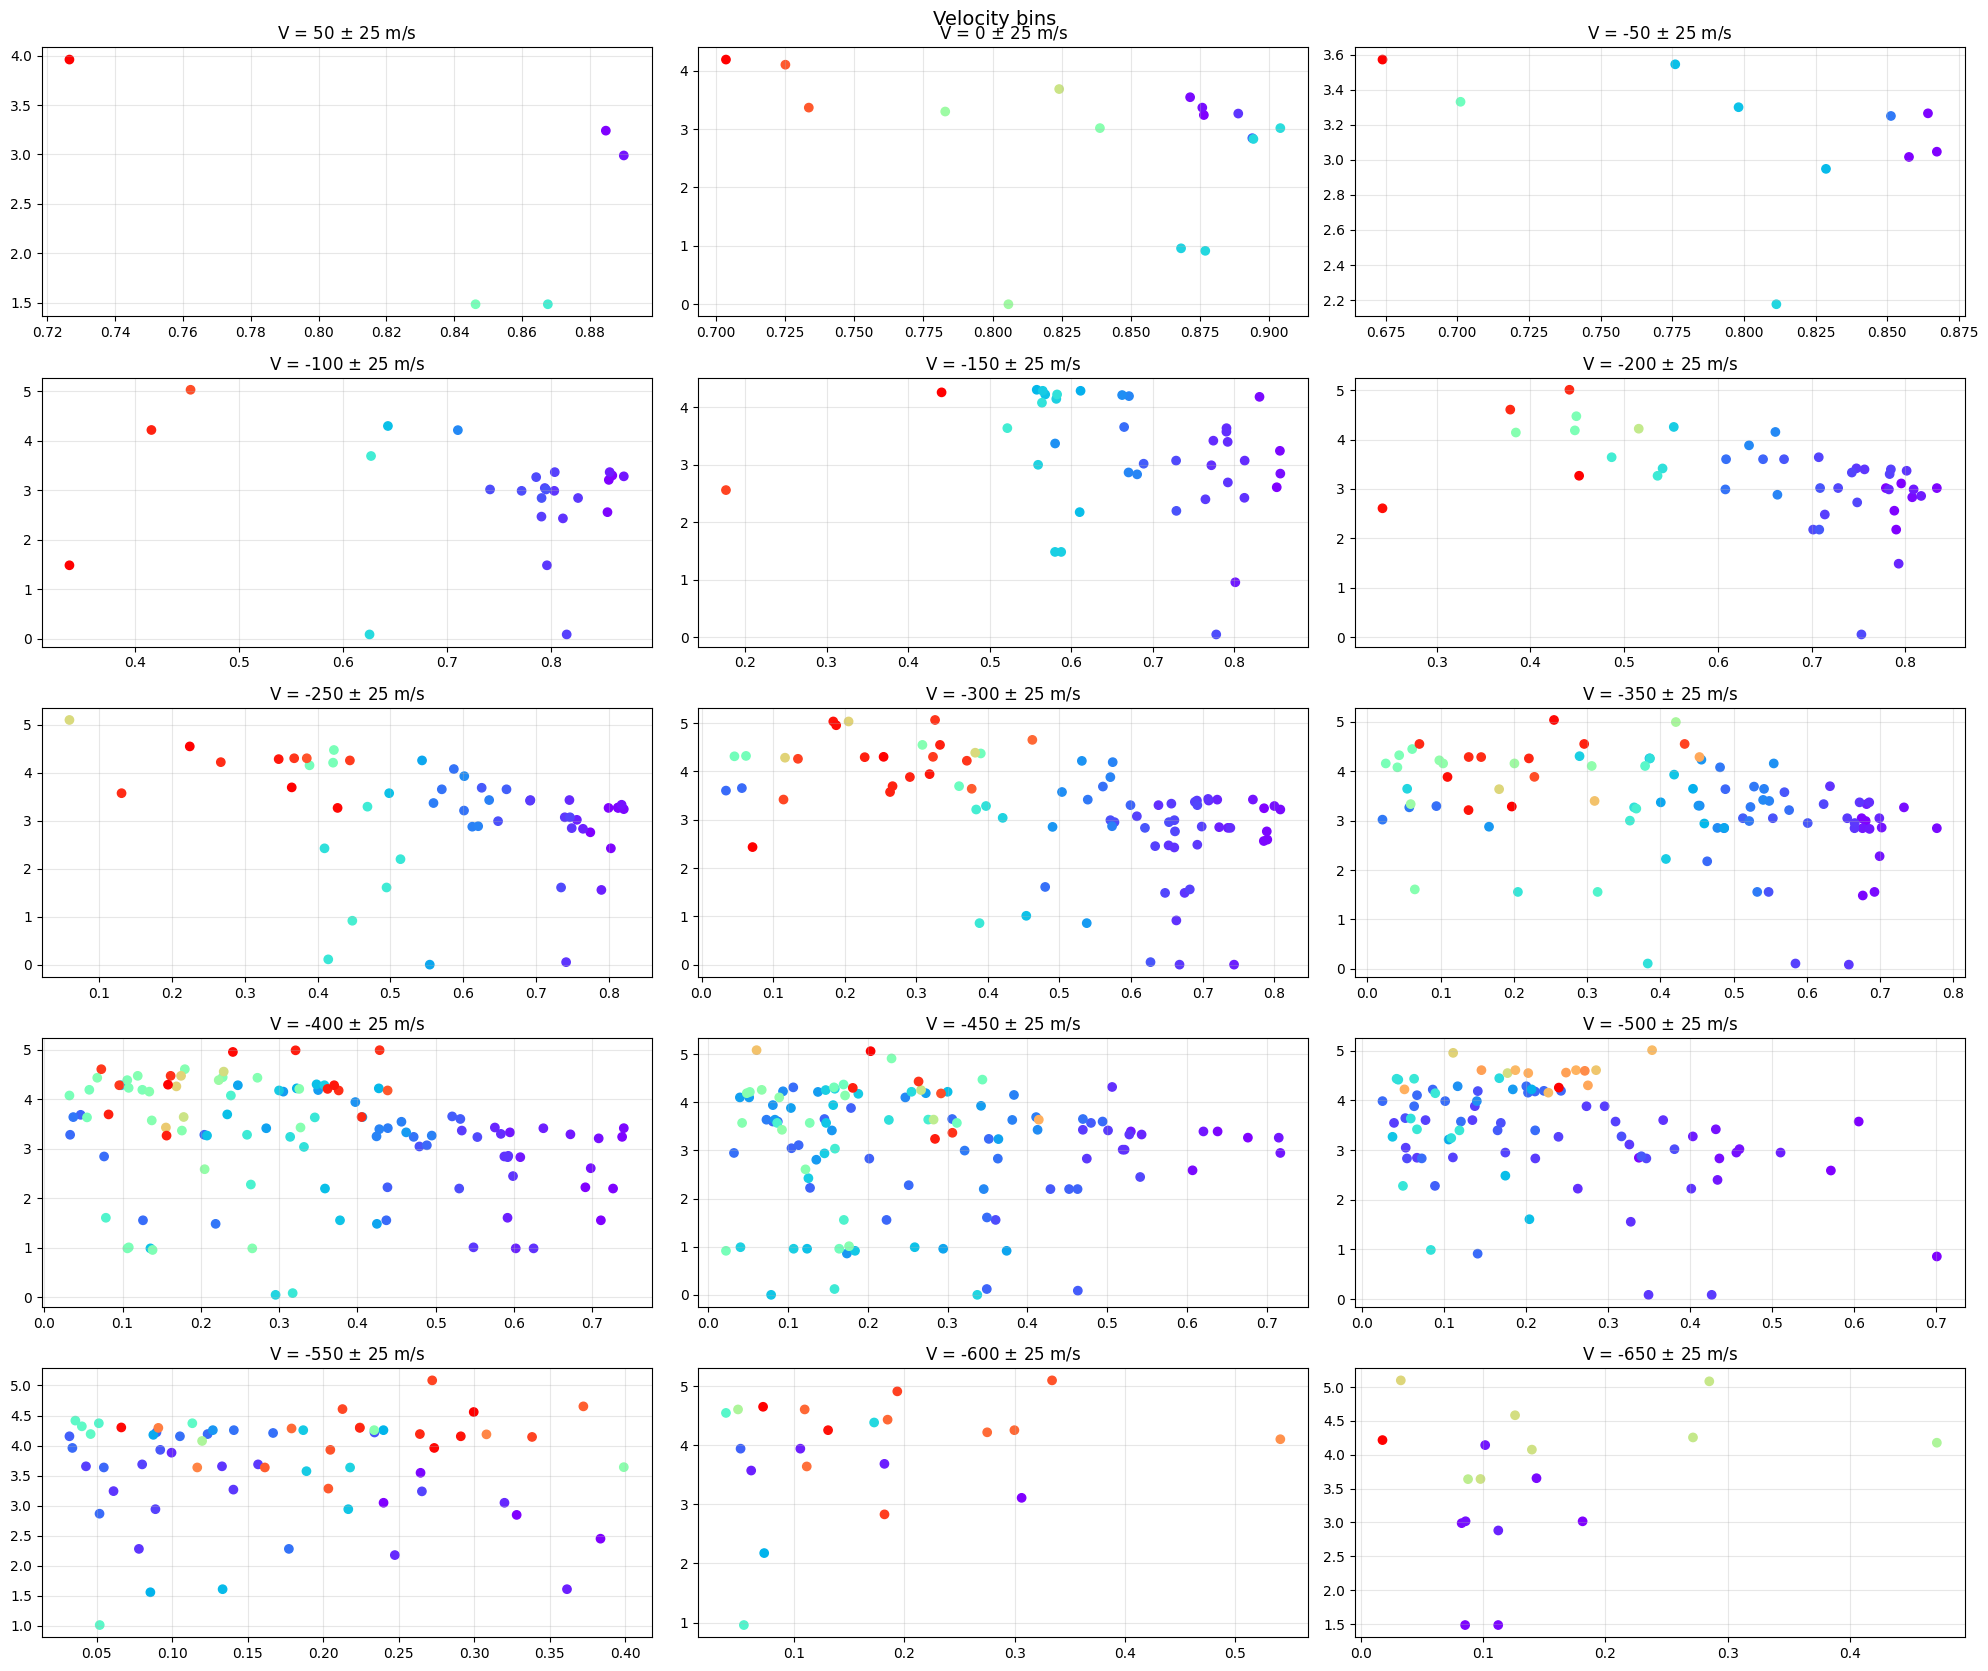

In [54]:
#Organize the dataframe wtih ascending velocities
listed = ALL_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(Energy_data[Energy_data['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Line Depth'],velocity_ALL[i]['Lower potential'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

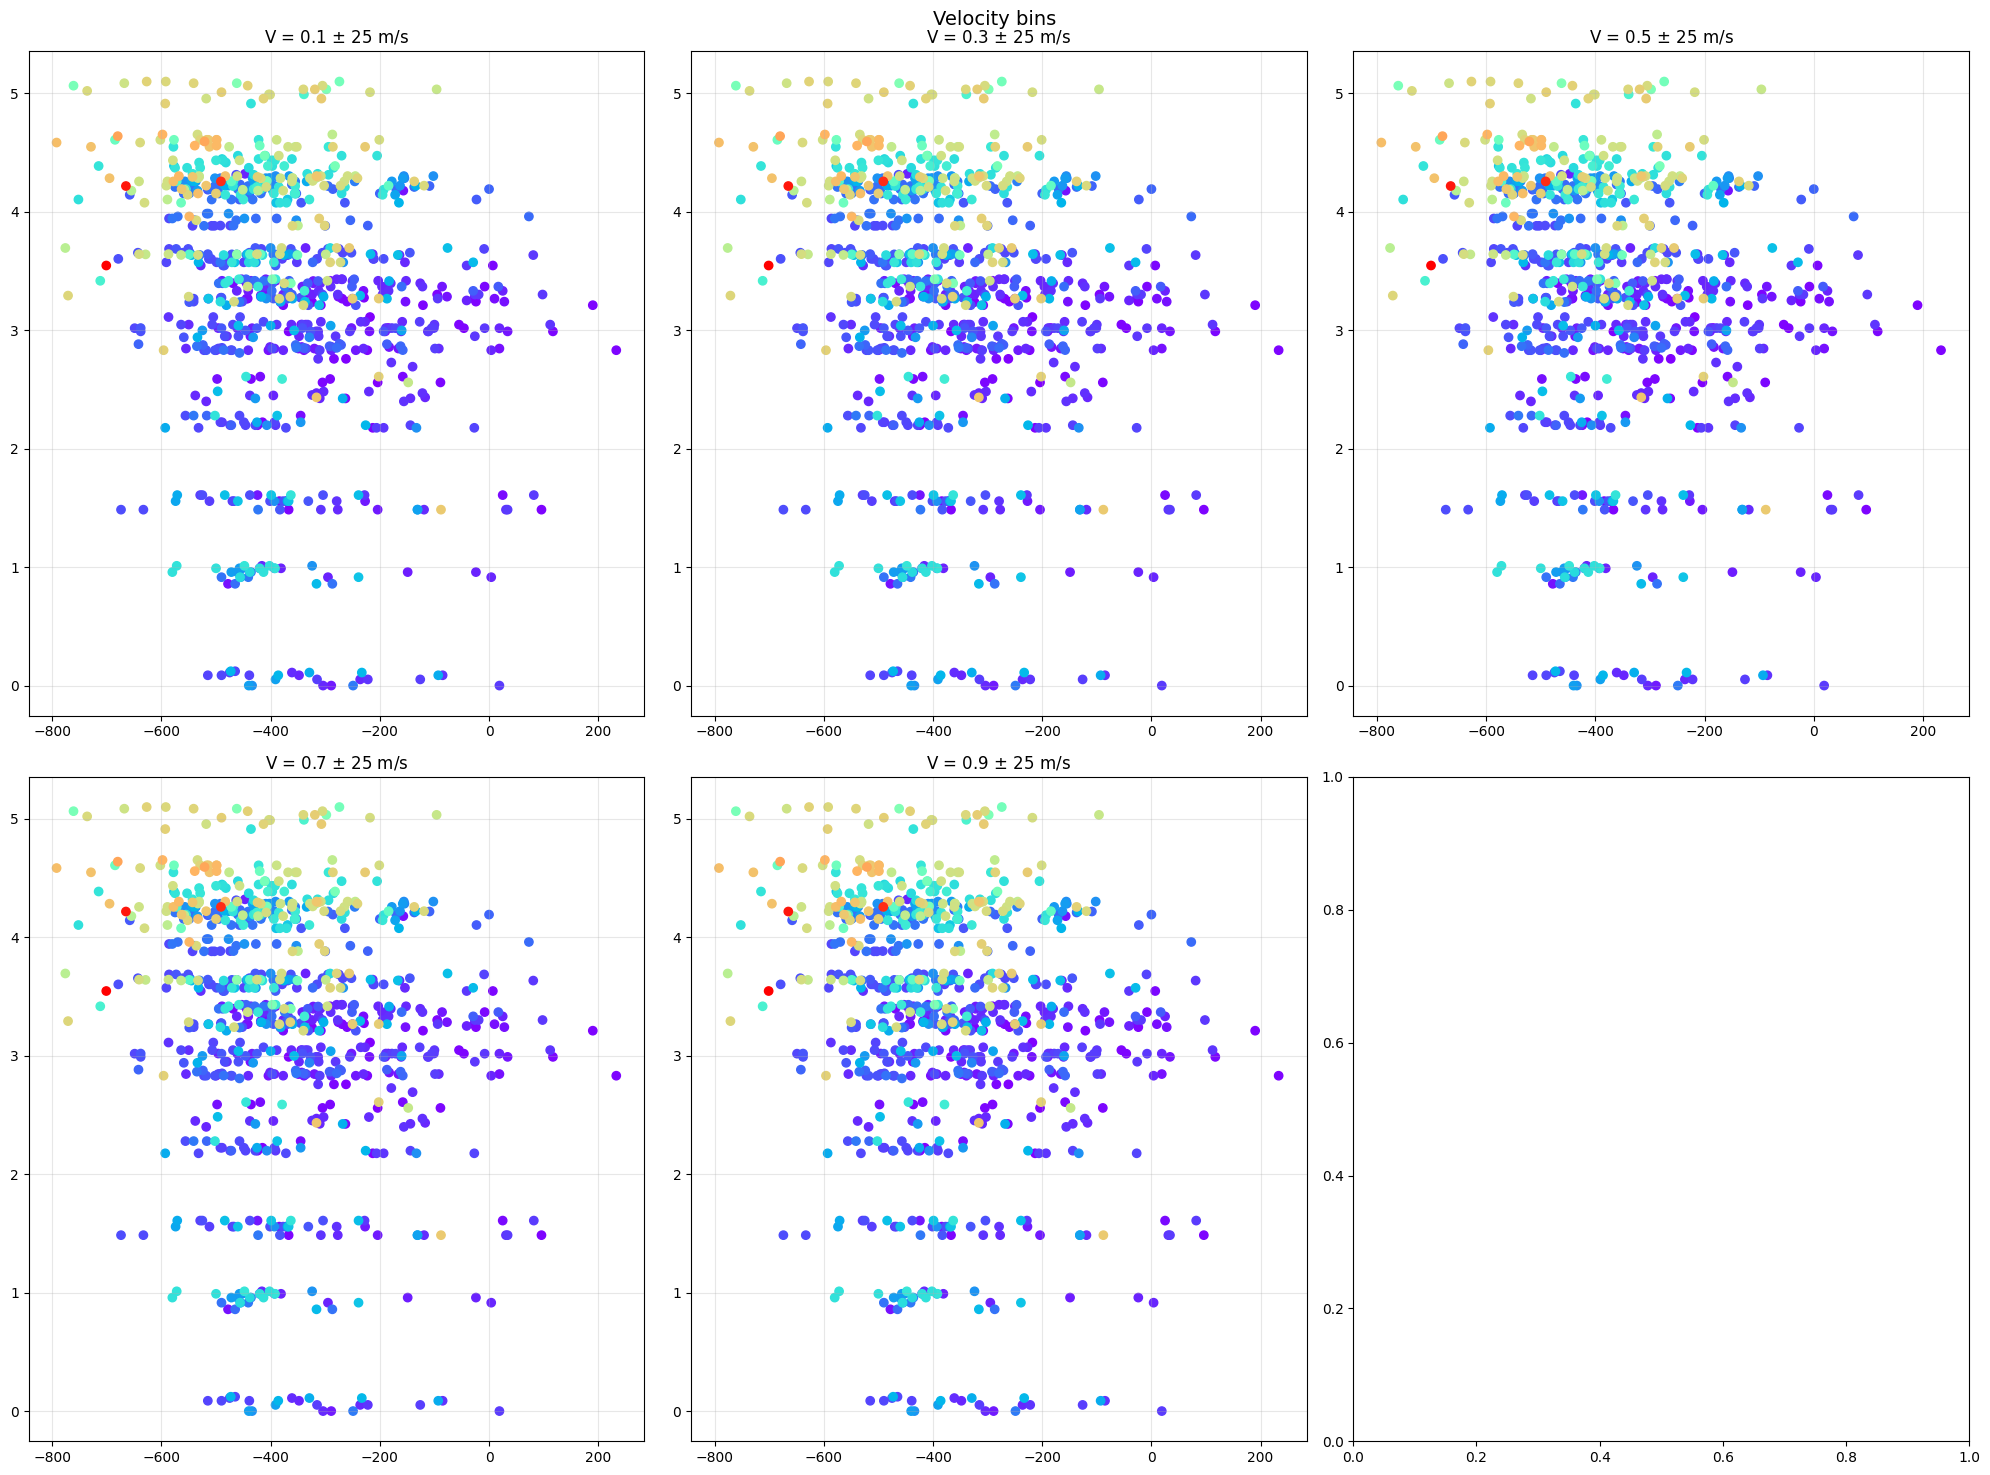

In [55]:
#Organize the dataframe wtih ascending velocities
ALL_data['Line Depth'] = 1- ALL_data['Flux']
listed = ALL_data.sort_values('Line Depth', ascending=True, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [0.1,0.3,0.5,0.7,0.9]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(Energy_data[Energy_data['Line Depth'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Velocity'],velocity_ALL[i]['Lower potential'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Theres no chromodependence at all in the lower excitation energy along the line depth, so this is not a reason.